In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [306]:
t = 100.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [307]:
tr[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5017039059786236
 0.8706156816297724
 0.34674239836587994

## Диапазон [-0.09635; -0.097]
## Начальные условия в единственном экземпляре 

In [308]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375

const xthr = 0.9; const ythr = 0.4 # ythr was change

α = 0.0900; U0 = 0.40; ΔU0 = 0.330; I0 =  -0.09659540  # -0.09639 # -0.096532

-0.0965954

In [309]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[8.6330581280078
 0.41660036531626415
 0.39699264628614483]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.6330581280078
 0.41660036531626415
 0.39699264628614483

In [310]:
"""
I0 -0.09655 
SA[0.5016565343933567
 0.8843561571148351
 0.3465491964077342

I0 -0.09658
SA[0.17859698043562283
 0.96512249099938
 0.37012169901914443]]
"""

"I0 -0.09655 \nSA[0.5016565343933567\n 0.8843561571148351\n 0.3465491964077342\n\nI0 -0.09658\nSA[0.17859698043562283\n 0.96512249099938\n 0.37012169901914443]]\n"

Cycle

parameters

const τ =  0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375
const xthr = 0.9; const ythr = 0.4 # ythr was change
α = 0.850; U0 = 0.3; ΔU0 = 0.305; I0 = -1.0

u0 [0.6388778225673112, 0.9509649024501307, 0.4624513204009227]

In [311]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [8.63306, 0.4166, 0.396993]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, 0.9, …, 0.33, 0.4375, -0.0965954]

In [312]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

In [313]:
tr

3-dimensional Dataset{Float64} with 100001 points
 16.5966    0.849126  0.419768
 17.4548    0.840948  0.419644
 18.3332    0.832457  0.419507
 19.2293    0.82366   0.419358
 20.1403    0.814565  0.419198
 21.0632    0.805182  0.419027
 21.9947    0.795525  0.418846
 22.9313    0.785606  0.418658
 23.8692    0.775444  0.418462
 24.8044    0.765057  0.41826
 25.7327    0.754465  0.418053
 26.65      0.74369   0.417841
 27.5519    0.732756  0.417626
  ⋮                   
  0.529731  0.862922  0.347227
  0.527141  0.863641  0.347176
  0.52456   0.864356  0.347126
  0.521988  0.865067  0.347078
  0.519424  0.865774  0.347031
  0.516869  0.866477  0.346986
  0.514323  0.867176  0.346942
  0.511784  0.867872  0.346899
  0.509253  0.868563  0.346858
  0.506729  0.869251  0.346818
  0.504213  0.869935  0.346779
  0.501704  0.870616  0.346742

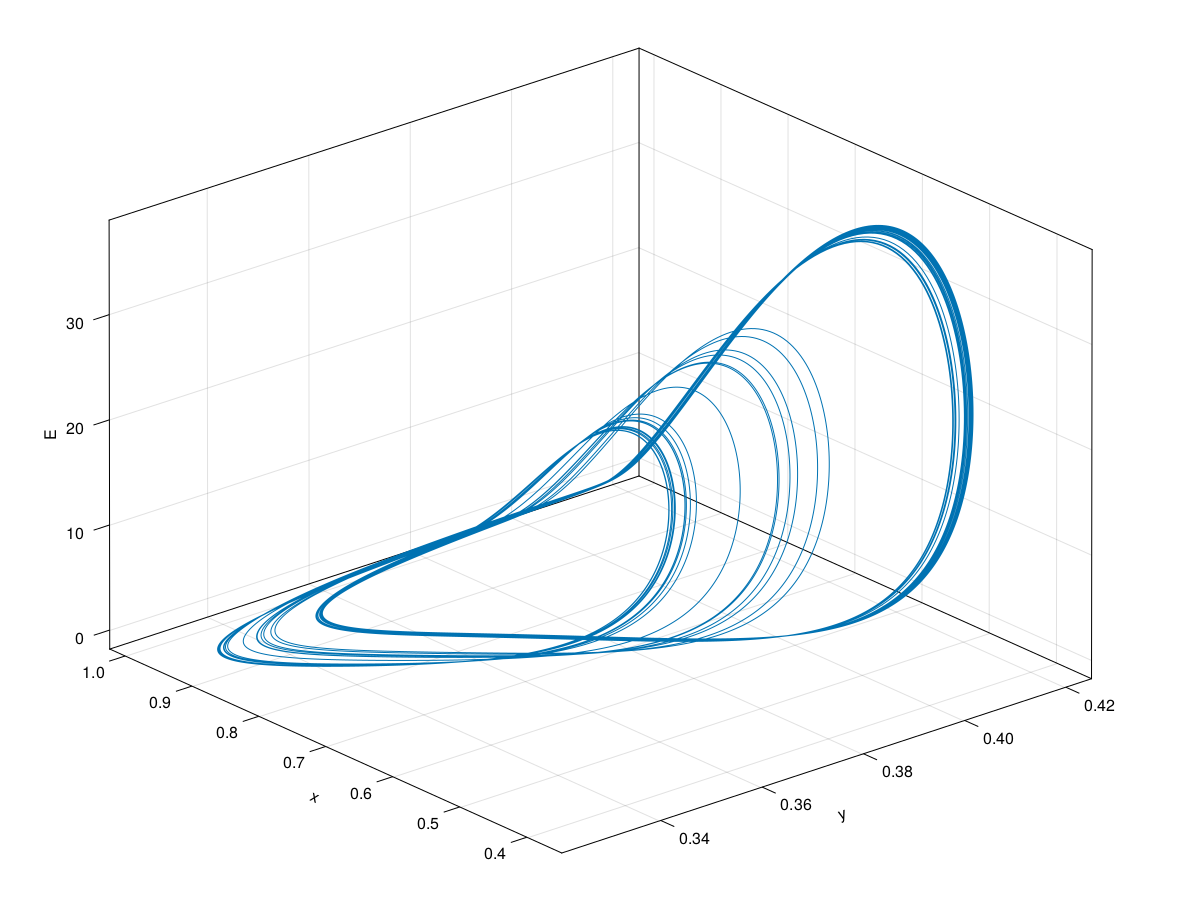

In [314]:
f = Figure(resolution = (1200, 900))
axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E")
lines!(axis3, tr[:, 3], tr[:, 2], tr[:, 1], linewidth = 1.0)
f

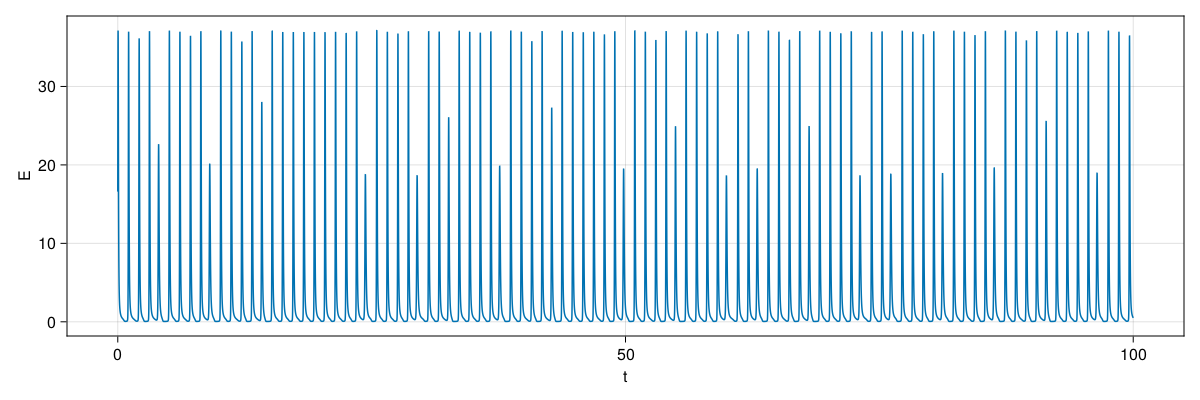

In [315]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "E")
lines!(axis, trange[:], tr[:, 1])
f

In [316]:
ds

3-dimensional continuous dynamical system
 state:       [8.63306, 0.4166, 0.396993]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, 0.9, …, 0.33, 0.4375, -0.0965954]

In [1772]:
[-0.09635; -0.097]

2-element Vector{Float64}:
 -0.09635
 -0.097

In [1467]:
range_I0 = range(-0.0963, -0.097, length = 50)

-0.0963:-1.4285714285714285e-5:-0.097

In [1477]:
initial_condition = SA[0.10760348063006954
 0.9625393113663498
 0.3658649870940249]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.10760348063006954
 0.9625393113663498
 0.3658649870940249